<a href="https://colab.research.google.com/github/lailatulqadri/DepressionDetectionProject/blob/main/Copy_of_Depression_Project_read_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
# create, and save df
from gspread_dataframe import set_with_dataframe
title = 'Extract Features'
gc.create(title)  # if not exist
sheet = gc.open(title).sheet1


In [ ]:
import pandas as pd
import io

df = pd.read_csv("file_test1.csv")
print(df)


    Unnamed: 0                                    tweet_processed  \
0            0  With all of this unnessary  family drama, I fe...   
1            1  I feel so sad because i can't be happy, and th...   
2            2  I went to church with my mom and a huge chunk ...   
3            3                               No love here....       
4            4  I see so many people moving forward with their...   
5            5  So I’m trying to help myself. To understand my...   
6            6  i just need for someone to rub my head tonight...   
7            7  There days where I wanna end my life so bad be...   
8            8              Well i guess no clockwork for me ????   
9            9  Can’t eat. Can’t sleep. Everything is just fal...   
10          10  Today I ate 1 month old rancid meat because I ...   
11          11    It always hurts to be the one who cared more ??   
12          12             I'm having trouble catching my breath.   
13          13  I normally don’t t

In [ ]:
df.columns

Index(['Unnamed: 0', 'tweet_processed', 'tweet_clean', 'target'], dtype='object')

In [ ]:
df_1 = df[['tweet_processed','target']]

In [ ]:
df_2 = df_1.groupby(['target'])

In [ ]:
df_dep = df_2.get_group(1)

In [ ]:
print(df_dep)

                                      tweet_processed  target
0   With all of this unnessary  family drama, I fe...       1
1   I feel so sad because i can't be happy, and th...       1
2   I went to church with my mom and a huge chunk ...       1
3                                No love here....           1
4   I see so many people moving forward with their...       1
5   So I’m trying to help myself. To understand my...       1
6   i just need for someone to rub my head tonight...       1
7   There days where I wanna end my life so bad be...       1
8               Well i guess no clockwork for me ????       1
9   Can’t eat. Can’t sleep. Everything is just fal...       1
10  Today I ate 1 month old rancid meat because I ...       1
11    It always hurts to be the one who cared more ??       1
12             I'm having trouble catching my breath.       1
13  I normally don’t talk about myself. But i feel...       1
14  The world I was raised in there is no give in ...       1
15  Ever

In [ ]:
absolutist_word =['absolutely','all','always','complete','completelt','constant','constantly','definitely','entire','ever','every','everyone','everything','full','must','never','nothing','totally','whole']

In [ ]:
first_person_singular = ['me','myself', 'i', 'mine', 'my', 'ourself']

In [ ]:
second_person_singular = ['you','your','yours','yourself']

In [ ]:
third_person_singular = ['he', 'him', 'his', 'himself', 'her', ' she', 'hers', 'herself']

In [ ]:
third_person =['it', 'its', 'itself']

In [ ]:
first_person_plural = ['we', 'us', 'our', 'ours', 'ourselves']

In [ ]:
second_person_plural = ['you', 'your', 'yours', 'yourselves']

In [ ]:
third_person_plural = ['they', 'them', 'their', 'theirs', 'themselves']

In [ ]:
feature_dict = [
     {
        'Doc_id': '' ,
        'Sent_id': '',
        'Word': '',
        'POS':'' ,

     },
   # in a real application one would extract many such dictionaries
 ]

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 13.9 MB/s 
     |████████████████████████████████| 106 kB 66.5 MB/s 


Remove picture link from tweets

In [ ]:
import re
def cleaning_PicURL (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text)
    return text


In [ ]:
scores = []

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 15.1 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 788 kB 56.2 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 182 kB 67.7 MB/s 
     |████████████████████████████████| 1.6 MB 52.7 MB/s 
     |████████████████████████████████| 981 kB 62.8 MB/s 
     |████████████████████████████████| 1.2 MB 56.5 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 5.5 MB 28.1 MB/s 
     |████████████████████████████████| 200 kB 53.9 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 7.6 MB 51.3 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=c7a70978acb7ba8f80a0c2f109e92bc4164d872d0144f01928634729f9fae8f2
  Stor

In [ ]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
classifier_flair = TextClassifier.load('en-sentiment')

2022-11-30 06:00:02,541 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp7j2c43wj


100%|██████████| 265512723/265512723 [00:08<00:00, 31627363.99B/s]

2022-11-30 06:00:11,027 copying /tmp/tmp7j2c43wj to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-11-30 06:00:11,721 removing temp file /tmp/tmp7j2c43wj
2022-11-30 06:00:11,841 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## import the libraries
import spacy
import spacytextblob
from spacytextblob.spacytextblob import SpacyTextBlob

import contractions


## load the language model
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")


In [ ]:
import json,itertools
# read Depression PHQ-9 Lexicon (DPL) from json file
with open("depression_lexicon.json") as f:
    seed_terms = json.load(f)

# read all seed terms into a list removing the underscore from all seeds
all_seeds_raw = [seed.replace("_"," ").encode('utf-8') for seed in list(itertools.chain.from_iterable([seed_terms[signal] for signal in seed_terms.keys()]))]

In [ ]:
import json,itertools
# read Depression PHQ-9 Lexicon (DPL) from json file
with open("depression_lexicon.json") as f:
    seed_terms = json.load(f)

signals =[]
signal_1 = []
signa1_2 = []
signal_3 = []
signal_4 = []
signal_5 = []
signal_6 = []
signal_7 = []
signal_8 = []
signal_9 = []
signal_10 = []
for signal in seed_terms.keys():
  print("**",signal)
  if(signal == "signal_1"):
    signal_1 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_1) 
  elif(signal == "signal_2"):
    signal_2 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_2)  
  elif(signal == "signal_3"):
    signal_3 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_3) 
  elif(signal == "signal_4"):
    signal_4 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_4) 
  elif(signal == "signal_5"):
    signal_5 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_5) 
  elif(signal == "signal_6"):
    signal_6 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_6) 
  elif(signal == "signal_7"):
    signal_7 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_7) 
  elif(signal == "signal_8"):
    signal_8 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_8) 
  elif(signal == "signal_9"):
    signal_9 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_9) 
  elif(signal == "signal_10"):
    signal_10 = seed_terms[signal] = [seed.replace("_"," ").encode('utf-8') for seed in seed_terms[signal]] 
    signals.append(signal_10) 
  else:
    print("no data")

** signal_1
** signal_2
** signal_3
** signal_4
** signal_5
** signal_6
** signal_7
** signal_8
** signal_9
** signal_10


In [ ]:
for sig in signal_8:
  print(sig)
  #if(sig == "signal_9"):
  #  for element in sig:
  #    print(element)

b'adagio'
b'agitated'
b'angry'
b'annoyed'
b'annoying'
b'antsy'
b'anxiety'
b'anxiety disorder'
b'anxious'
b'babbling'
b'behind schedule'
b'berserk'
b'delirious'
b'deranged'
b'dilatory'
b'discompose'
b'disconcert'
b'distraught'
b'disturb'
b'dragging'
b'fidget'
b'fidgety'
b'flaneur'
b'frantic'
b'frenetic'
b'frenzied'
b'fretful'
b'furious'
b'getting behind'
b'hectic'
b'hyperactive'
b'hysteric'
b'hysterical'
b"i can't breath"
b"i'm slow"
b"i'm slow moving"
b'impatient'
b'incoherent'
b'irrational'
b'laggard'
b'larghetto'
b'larghissimo'
b'largo'
b'lentissimo'
b'lento'
b'loafer'
b'long-play'
b'long-playing'
b'lounger'
b'lunatic'
b'moving or speaking fast'
b'moving or speaking slowly'
b'nervous'
b'obtuse'
b'overwrought'
b'panic'
b'panic attack'
b'panic stricken'
b'paranoia'
b'paranoid'
b'perturbed'
b'phrenetic'
b'poky'
b'raring'
b'raving'
b'restive'
b'restless'
b'restlessness'
b'shaking'
b'slow up'
b'slow-moving'
b'spasmodic'
b'spaz'
b'spazz'
b'spazz out'
b'squirm'
b'straggler'
b'stressed out'


In [ ]:

signal_1_normalized=[]
for word in signal_1:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_1_normalized.append(expanded_seed)
print(signal_1_normalized)


signal_2_normalized=[]
for word in signal_2:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_2_normalized.append(expanded_seed)
print(signal_2_normalized)


signal_3_normalized=[]
for word in signal_3:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_3_normalized.append(expanded_seed)
print(signal_3_normalized)


signal_4_normalized=[]
for word in signal_4:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_4_normalized.append(expanded_seed)
print(signal_4_normalized)


signal_5_normalized=[]
for word in signal_5:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_5_normalized.append(expanded_seed)
print(signal_5_normalized)


signal_6_normalized=[]
for word in signal_6:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_6_normalized.append(expanded_seed)
print(signal_6_normalized)


signal_7_normalized=[]
for word in signal_7:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_7_normalized.append(expanded_seed)
print(signal_7_normalized)


signal_8_normalized=[]
for word in signal_8:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_8_normalized.append(expanded_seed)
print(signal_8_normalized)


signal_9_normalized=[]
for word in signal_9:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_9_normalized.append(expanded_seed)
print(signal_9_normalized)


signal_10_normalized=[]
for word in signal_10:
  word = word.decode('utf-8', errors="ignore")
  expand_seeds=[]
  for i in word.split():
    expand_seeds.append(contractions.fix(i)) 
    #expand_seeds.append(contractions.fix(word))
  expanded_seed = ' '.join(expand_seeds)
  signal_10_normalized.append(expanded_seed)
print(signal_10_normalized)

['absence of pleasure', 'acedia', 'anhedonia', 'anhedonic', 'antipathy', 'apathetic', 'apathy', 'beyond caring', 'bored', 'boredom', 'boring', 'cannot be arsed', 'cannot be assed', 'cannot be bothered', 'cannot be fucked', 'cannot be fagged', 'cba', 'cebs', 'ceebs', 'ceeebs', 'could not care less', 'dampened', 'detachment', 'disinclination', 'disinterest', 'disinterested', 'dispirited', 'dissatisfaction', 'do not want this', 'do not want to do', 'dullness', 'eccedentesiast', 'faking smile', 'fed up', 'flatness', 'halfhearted', 'hatred', 'heartless', 'hiding sadness', 'ho-hum', 'i do not care', 'inability to experience pleasure', 'incuriosity', 'incuriosity', 'indifference', 'indifferent', 'indisposition', 'insensitive', 'jaded', 'jadedness', 'joyless', 'lack of concern', 'lack of desire', 'lack of emotion', 'lack of enthusiasm', 'lack of excitement', 'lack of interest', 'lack of joy', 'lack of motivation', 'lack of passion', 'lack of pleasure', 'lackluster', 'last thing i want to do', 

In [ ]:
signal_dict = {"lost_interest":signal_1_normalized, 
               "feeling_down":signal_2_normalized, 
               "trouble_sleeping":signal_3_normalized,
               "feeling_tired":signal_4_normalized,
               "eating_problem": signal_5_normalized,
               "feeling_bad_about_yourself": signal_6_normalized,
               "trouble_concentrating":signal_7_normalized,
               "movoing_speakig_slow_alot":signal_8_normalized,
               "thought_of_self_hurting":signal_9_normalized,
               "medication": signal_10_normalized}

In [ ]:
print(signal_dict ["lost_interest"])

['absence of pleasure', 'acedia', 'anhedonia', 'anhedonic', 'antipathy', 'apathetic', 'apathy', 'beyond caring', 'bored', 'boredom', 'boring', 'cannot be arsed', 'cannot be assed', 'cannot be bothered', 'cannot be fucked', 'cannot be fagged', 'cba', 'cebs', 'ceebs', 'ceeebs', 'could not care less', 'dampened', 'detachment', 'disinclination', 'disinterest', 'disinterested', 'dispirited', 'dissatisfaction', 'do not want this', 'do not want to do', 'dullness', 'eccedentesiast', 'faking smile', 'fed up', 'flatness', 'halfhearted', 'hatred', 'heartless', 'hiding sadness', 'ho-hum', 'i do not care', 'inability to experience pleasure', 'incuriosity', 'incuriosity', 'indifference', 'indifferent', 'indisposition', 'insensitive', 'jaded', 'jadedness', 'joyless', 'lack of concern', 'lack of desire', 'lack of emotion', 'lack of enthusiasm', 'lack of excitement', 'lack of interest', 'lack of joy', 'lack of motivation', 'lack of passion', 'lack of pleasure', 'lackluster', 'last thing i want to do', 

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/LIAAD/yake
import yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-o_6jwsb3
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-o_6jwsb3
     |████████████████████████████████| 132 kB 14.2 MB/s 
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=62600 sha256=e40c868aebae3feb788d32de22d0d7b89bc3a5f1173a99b4117903d241e636cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zuqgudp/wheels/52/79/f4/dae9309f60266aa3767a4381405002b6f2955fbcf038d804da
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=74018 sha256=0f0c454abad699145c3f8d070ee4238ea1adb39f4af7299217f38ffd23a8ce04
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built yake jellyfish


In [ ]:
for i in signal_dict:
  print(signal_dict[i])

['absence of pleasure', 'acedia', 'anhedonia', 'anhedonic', 'antipathy', 'apathetic', 'apathy', 'beyond caring', 'bored', 'boredom', 'boring', 'cannot be arsed', 'cannot be assed', 'cannot be bothered', 'cannot be fucked', 'cannot be fagged', 'cba', 'cebs', 'ceebs', 'ceeebs', 'could not care less', 'dampened', 'detachment', 'disinclination', 'disinterest', 'disinterested', 'dispirited', 'dissatisfaction', 'do not want this', 'do not want to do', 'dullness', 'eccedentesiast', 'faking smile', 'fed up', 'flatness', 'halfhearted', 'hatred', 'heartless', 'hiding sadness', 'ho-hum', 'i do not care', 'inability to experience pleasure', 'incuriosity', 'incuriosity', 'indifference', 'indifferent', 'indisposition', 'insensitive', 'jaded', 'jadedness', 'joyless', 'lack of concern', 'lack of desire', 'lack of emotion', 'lack of enthusiasm', 'lack of excitement', 'lack of interest', 'lack of joy', 'lack of motivation', 'lack of passion', 'lack of pleasure', 'lackluster', 'last thing i want to do', 

In [ ]:
!pip install empath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 5.0 MB/s 
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57822 sha256=f1d6f85f8afd3b5a49f1d9911bcd58641e7814be3c2699117621b9b80fd9af5a
  Stored in directory: /root/.cache/pip/wheels/2b/78/a8/37d4505eeae79807f4b5565a193f7cfcee892137ad37591029
Successfully built empath


In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
doc_id =0

feature_extract = pd.DataFrame(columns = ['Doc_id','Sentiment','Symptom_list','Sent_id','Sent', 'Lemma', 'POS', 'TAG', 'DEP', 'Absolute', 'Pronoun'])
feature_extract_tweet = pd.DataFrame(columns = ['Doc_id','Sentence','Sentiment','Word_Count','Pronoun1st_List','Pronoun1st_Count', 'Pronoun1st_Average', 'Pronoun2nd_List','Pronoun2nd_Count', 'Pronoun2nd_Average', 'Pronoun3rd_List','Pronoun3rd_Count', 'Pronoun3rd_Average','Absolute_List', 'Absolute_Count' ])
# iterate through the csv file
print(df_dep.tweet_processed.size)
doc_id = 0

# analyse for each tweet
doc_sentiment = ''

#val refers to each tweet
for val in df_dep.tweet_processed:
   
      
    # typecaste each val to string
    val = str(val)
    

    print(val)


    

    val  = cleaning_PicURL (val)
    # creating an empty list
    expanded_words = []   
    for word in val.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  
   
    # solve contraction form before analysis- clean your text
    expanded_text = ' '.join(expanded_words)
    print('Expanded_text: ', expanded_text)

    #what are the main concept in the text?
    print("a",lexicon.analyze(expanded_text, normalize=True))
    
    print("b",lexicon.analyze(expanded_text))

52
With all of this unnessary  family drama, I feel like moving far away and starting over again. From one thing to another I just feel . Hope I get through this
Expanded_text:  With all of this unnessary family drama, I feel like moving far away and starting over again. From one thing to another I just feel . Hope I get through this
a {'help': 0.0, 'office': 0.0, 'dance': 0.0, 'money': 0.0, 'wedding': 0.03225806451612903, 'domestic_work': 0.03225806451612903, 'sleep': 0.0, 'medical_emergency': 0.0, 'cold': 0.06451612903225806, 'hate': 0.0, 'cheerfulness': 0.0, 'aggression': 0.0, 'occupation': 0.0, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.03225806451612903, 'vacation': 0.0, 'crime': 0.0, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.0, 'pride': 0.0, 'dispute': 0.0, 'nervousness': 0.06451612903225806, 'government': 0.0, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.03225806451612903, 'suffering': 0.0, 'royalty': 0.0, 'wealthy': 0.0, 'tourism'

In [ ]:

doc_id =0

feature_extract = pd.DataFrame(columns = ['Doc_id','Sentiment','Symptom_list','Sent_id','Sent', 'Lemma', 'POS', 'TAG', 'DEP', 'Absolute', 'Pronoun'])
feature_extract_tweet = pd.DataFrame(columns = ['Doc_id','Sentence','Sentiment','Word_Count','Pronoun1st_List','Pronoun1st_Count', 'Pronoun1st_Average', 'Pronoun2nd_List','Pronoun2nd_Count', 'Pronoun2nd_Average', 'Pronoun3rd_List','Pronoun3rd_Count', 'Pronoun3rd_Average','Absolute_List', 'Absolute_Count' ])
# iterate through the csv file
print(df_dep.tweet_processed.size)
doc_id = 0

# analyse for each tweet
doc_sentiment = ''

#val refers to each tweet
for val in df_dep.tweet_processed:
   
      
    # typecaste each val to string
    val = str(val)
    

    print(val)


    

    val  = cleaning_PicURL (val)
    # creating an empty list
    expanded_words = []   
    for word in val.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  
   
    # solve contraction form before analysis- clean your text
    expanded_text = ' '.join(expanded_words)
    print('Expanded_text: ', expanded_text)

    #what are the main concept in the text?
    

    # in this project - it will use flair
    sentence = Sentence(expanded_text)
    classifier_flair.predict(sentence)
    # print sentence with predicted labels
    print('--flair-- ', sentence.labels[0].value)
    sentiment_save = sentence.labels[0].value

    sentence_save = expanded_text
    doc = nlp(expanded_text)
    words = [token.text for token in doc if token.is_punct != True]
    print(len(words))
    word_count_save = len(words)
    #print("-spacy/textblob-",doc._.blob.polarity)    

    # for each tweet, get the sentiment score - positive/negative
    #print("-- spacy/textblob--",sentence.labels[0].value)
    #scores.append(sentence.labels[0].value)
    #doc_sentiment = sentence.labels[0].value
    
  





    # for each tweet, get the symtopn_list
    #check for each signal

    for i in signal_dict:
      symptom_1 =[]
      symptom_2 =[]
      symptom_3 =[]
      symptom_4 =[]
      symptom_5 =[]
      symptom_6 =[]
      symptom_7 =[]
      symptom_8 =[]
      symptom_9 =[]
      symptom_10 =[]
      symptom_list=[]

      for seed in signal_dict[i]:
        #print(seed)
         if seed in expanded_text:
            print(">>",seed)
            symptom_list.append(seed)
            tweet = expanded_text.replace(seed, seed.replace(" ", "_"))
            #print("||",tweet)
      if(len(symptom_list) != 0):
        print(i,"---------------",symptom_list)    
      symtom_list=[]
    


    sent_id =0
    # we will use this for tokenization

    #calculate numbers of word in the tweet


    # run analysis for each sentence



    pronoun_1st_person_list=[]  
    pronoun_2nd_person_list=[]  
    pronoun_3rd_person_list=[]  
    absolute_list=[]
    #print("xx",pronoun_list)
    # run analysis for each sentence
    for sent in doc.sents:
      

      #print(sent.text)
      sent_id = sent_id + 1

      #for each sentence, we split to token
      tokens = sent.text.split()
          # Converts each token into lowercase
      token_id = 0
      

      for token in sent:
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        #    token.shape_, token.is_alpha, token.is_stop)
        absolute = ''
        if (token.text.lower() in absolutist_word):
            absolute = 'Yes'
            absolute_list.append(token.text.lower())

        else:
            absolote = 'No'
        
        pronoun = ''
        #check for 1st person
        if (token.text.lower() in first_person_singular):
            pronoun_1st_person_list.append(token.text.lower())
            print("xxxxxxxxxxxxx",token.text.lower())
        elif (token.text.lower() in first_person_plural):
            pronoun_1st_person_list.append(token.text.lower())

        #check for 2nd person
        elif (token.text.lower() in second_person_singular):
            pronoun_2nd_person_list.append(token.text.lower())
        elif (token.text.lower() in second_person_plural):
            pronoun_2nd_person_list.append(token.text.lower())

        #check for 3rd person
        elif (token.text.lower() in third_person):
          pronoun_3rd_person_list.append(token.text.lower())
        elif (token.text.lower() in third_person_singular):
          pronoun_3rd_person_list.append(token.text.lower())
        elif (token.text.lower() in third_person_plural):
            pronoun_3rd_person_list.append(token.text.lower())

        else:
            pronoun = "unknown"

        feature_extract = feature_extract.append({'Doc_id':doc_id,'Sentiment': doc_sentiment , 'Symptom_list':symptom_list,'Sent_id':sent_id,'Sent':sent.text,'Token_id' : token_id, "Word": token.text, "Lemma": token.lemma_, "POS": token.pos_, "TAG": token.tag_, "DEP": token.dep_, "Absolute": absolute, "Pronoun" : pronoun, "lost_interest":signal_1, "feeling_down":signal_2, "trouble_sleeping":signal_3,"feeling_tired":signal_4, "eating_problem": signal_5,"feeling_bad_about_yourself": signal_6,"trouble_concentrating":signal_7, "movoing_speakig_slow_alot":signal_8, "thought_of_self_hurting":signal_9, "medication": signal_10   },ignore_index = True)
       
      #for i in range(len(tokens)):
        #tokens[i] = tokens[i].lower()
      #  print(tokens[i])
        

        #feature_extract = feature_extract.append({'Doc_id':doc_id,'Sent_id':sent_id,'Sent':sent.text,'Token_id' : token_id, "Word": tokens[i] },ignore_index = True)
        token_id = token_id +1
    
    #count how many pronoun in text
    print("pronoun list",pronoun_1st_person_list)
    print("pronoun list length",len(pronoun_1st_person_list))
    
    #percentage number of pronoun1st per word in tweet
    print("percentage 1st pronoun in tweet: ", len(pronoun_1st_person_list)/len(words))
    pronoun_1st_person_count = len(pronoun_1st_person_list)
    print("xx",pronoun_1st_person_count)
    pronoun1st_average_save = len(pronoun_1st_person_list)/len(words)

    #percentage number of pronoun 2nd per word in tweet
    print("percentage 2nd pronoun in tweet: ", len(pronoun_2nd_person_list)/len(words))
    pronoun_2nd_person_count = len(pronoun_2nd_person_list)
    print("xx",pronoun_2nd_person_count)
    pronoun2nd_average_save = len(pronoun_2nd_person_list)/len(words)

    #percentage number of pronoun1st per word in tweet
    print("percentage 3rd pronoun in tweet: ", len(pronoun_3rd_person_list)/len(words))
    pronoun_3rd_person_count = len(pronoun_3rd_person_list)
    print("xx",pronoun_3rd_person_count)
    pronoun3rd_average_save = len(pronoun_3rd_person_list)/len(words)
    

    #count how many absolute list in the text
    print("absolute list:",absolute_list)
    print("absolute list length",len(absolute_list))
    absolute_list_count = len(absolute_list)

    feature_extract_tweet = feature_extract_tweet.append({'Doc_id':doc_id, 'Sentence': sentence_save, 'Sentiment':sentiment_save, 'Word_Count':word_count_save, 'Pronoun1st_List':pronoun_1st_person_list, 'Pronoun1st_Count':pronoun_1st_person_count ,'Pronoun1st_Average': pronoun1st_average_save, 'Pronoun2nd_List':pronoun_2nd_person_list, 'Pronoun2nd_Count':pronoun_2nd_person_count ,'Pronoun2st_Average': pronoun2nd_average_save, 'Pronoun3rd_List':pronoun_3rd_person_list, 'Pronoun3rd_Count':pronoun_3rd_person_count ,'Pronoun3rd_Average': pronoun3rd_average_save, 'Absolute_List':absolute_list, 'Absolute_Count':absolute_list_count,'Sympton_List':symptom_list},ignore_index = True)
#'Doc_id','Sentiment','Symptom_list','Pronoun_Count', 'Pronoun_Average', 'Absolute_List', 'Absolute_Count' 

    pronoun_list=[]
    absolute_list = []
    doc_id = doc_id + 1
    #symptom_list=[]



 

In [ ]:
set_with_dataframe(sheet, feature_extract_tweet) 
# include_index=False, include_column_header=True, resize=False

In [ ]:
print(scores)

In [ ]:
print(feature_extract.head(10))

  Doc_id Sentiment Symptom_list Sent_id  \
0      0                     []       1   
1      0                     []       1   
2      0                     []       1   
3      0                     []       1   
4      0                     []       1   
5      0                     []       1   
6      0                     []       1   
7      0                     []       1   
8      0                     []       1   
9      0                     []       1   

                                                Sent      Lemma    POS  TAG  \
0  With all of this unnessary family drama, I fee...       with    ADP   IN   
1  With all of this unnessary family drama, I fee...        all   PRON   DT   
2  With all of this unnessary family drama, I fee...         of    ADP   IN   
3  With all of this unnessary family drama, I fee...       this    DET   DT   
4  With all of this unnessary family drama, I fee...  unnessary    ADJ   JJ   
5  With all of this unnessary family drama, I fee...

In [ ]:
from google.colab import files

feature_extract.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

- 0
* 0
y 0


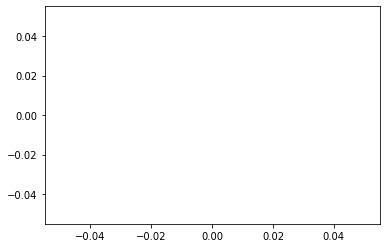

- 0
* 0
y 0


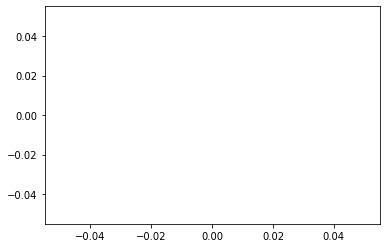

In [ ]:
import matplotlib.pyplot as plt
pos = scores.count('POSITIVE')
neg = scores.count('NEGATIVE')
neu = scores.count('Neutral')

print("-",pos)
print("*",neg)
print("y",neu)


# Plot bar chart with data points
plt.bar(scores, scores)

# Display the plot
plt.show()